In [60]:
import time
import pandas as pd
import numpy as np
import json
from datetime import datetime
import matplotlib.pyplot as plt

# 1. Tải dữ liệu từ file json

In [61]:
with open('commits.json', 'r') as file:
    commits = json.load(file)

# 2. Tạo bảng dữ liệu commits với những dữ liệu cần thiết

In [62]:
frame = pd.DataFrame(commits)

date = []
for data in frame.iloc[:]['commit']:
    date.append(data['author']['date'])

frame['Date'] = date
frame = frame.drop('parents', axis='columns')
frame = frame.drop('node_id', axis='columns')
frame = frame.drop('url', axis='columns')
frame = frame.drop('html_url', axis='columns')
frame = frame.drop('comments_url', axis='columns')

author = []
email = []
for data in frame.iloc[:]['commit']:
    author.append(data['author']['name'])
    email.append(data['author']['email'])
frame['Author'] = author
frame['Email'] = email
    
frame

,sha,commit,author,committer,Date,Author,Email
0,8bf8f41fc017531b502fe77b36c3b14e180cec5c,"{'author': {'name': 'Rémi Verschelde', 'email'...","{'login': 'akien-mga', 'id': 4701338, 'node_id...","{'login': 'akien-mga', 'id': 4701338, 'node_id...",2024-05-29T09:20:17Z,Rémi Verschelde,rverschelde@gmail.com
1,219af366a5922169c49c60a3a0beaa892275c013,"{'author': {'name': 'Rémi Verschelde', 'email'...","{'login': 'akien-mga', 'id': 4701338, 'node_id...","{'login': 'akien-mga', 'id': 4701338, 'node_id...",2024-05-29T09:20:14Z,Rémi Verschelde,rverschelde@gmail.com
2,05442e81c0fac409269662d090273159c0b5a210,"{'author': {'name': 'Rémi Verschelde', 'email'...","{'login': 'akien-mga', 'id': 4701338, 'node_id...","{'login': 'akien-mga', 'id': 4701338, 'node_id...",2024-05-29T09:20:11Z,Rémi Verschelde,rverschelde@gmail.com
3,6c7ca019d79d4c1a36578fcdf597a9cdf5683fce,"{'author': {'name': 'Rémi Verschelde', 'email'...","{'login': 'akien-mga', 'id': 4701338, 'node_id...","{'login': 'akien-mga', 'id': 4701338, 'node_id...",2024-05-29T09:20:08Z,Rémi Verschelde,rverschelde@gmail.com
4,b60471f3c0ea219680e3e929a2940a8b9e6be18b,"{'author': {'name': 'Rémi Verschelde', 'email'...","{'login': 'akien-mga', 'id': 4701338, 'node_id...","{'login': 'akien-mga', 'id': 4701338, 'node_id...",2024-05-29T09:20:04Z,Rémi Verschelde,rverschelde@gmail.com
...,...,...,...,...,...,...,...
64376,ebc38f099d6faa73769512ab881d17302b2ef493,"{'author': {'name': 'Juan Linietsky', 'email':...","{'login': 'reduz', 'id': 6265307, 'node_id': '...","{'login': 'reduz', 'id': 6265307, 'node_id': '...",2014-02-10T02:12:50Z,Juan Linietsky,reduzio@gmail.com
64377,9ccd3615fef9244cb7999bd7b591e654caa47d87,"{'author': {'name': 'Juan Linietsky', 'email':...","{'login': 'reduz', 'id': 6265307, 'node_id': '...","{'login': 'reduz', 'id': 6265307, 'node_id': '...",2014-02-10T02:11:44Z,Juan Linietsky,reduzio@gmail.com
64378,0b806ee0fc9097fa7bda7ac0109191c9c5e0a1ac,"{'author': {'name': 'Juan Linietsky', 'email':...","{'login': 'reduz', 'id': 6265307, 'node_id': '...","{'login': 'reduz', 'id': 6265307, 'node_id': '...",2014-02-10T01:10:30Z,Juan Linietsky,reduzio@gmail.com
64379,0e49da1687bc8192ed210947da52c9e5c5f301bb,"{'author': {'name': 'Juan Linietsky', 'email':...","{'login': 'reduz', 'id': 6265307, 'node_id': '...","{'login': 'reduz', 'id': 6265307, 'node_id': '...",2014-01-04T16:08:52Z,Juan Linietsky,reduzio@gmail.com


# 3. Tạo bảng dữ liệu về lượng commits từng năm

In [63]:
commits_by_year = {
    2024: [],
    2023: [],
    2022: [],
    2021: [],
    2020: [],
    2019: [],
    2018: [],
    2017: [],
    2016: [],
    2015: [],
    2014: [],
    2013: []

}
for index, date in enumerate(frame['Date']):
    commit_date = datetime.strptime(date, '%Y-%m-%dT%H:%M:%SZ')
    year = commit_date.year
    if year in commits_by_year:
        commits_by_year[year].append(frame.iloc[index])

commits_each_year = []
for i in range(2013, 2025):
    commits_each_year.append(len(commits_by_year[i]))
numbers_of_commits_by_year = pd.DataFrame(commits_each_year, index=(i for i in range(2013, 2025)), columns=['Commits'])

numbers_of_commits_by_year

,Commits
2013,1
2014,703
2015,1944
2016,3490
2017,5973
2018,6325
2019,7152
2020,6864
2021,7886
2022,10136


# 4. Số lượng commits của từng người

In [64]:
authors = {}
for author in frame['Author']:
    if author in authors:
        authors[author] += 1
    else:
        authors[author] = 1

sorted_items = sorted(authors.items(), key=lambda item : item[1], reverse=True)
sorted_author = {k: v for k, v in sorted_items}

sorted_author

{'Rémi Verschelde': 27144,
 'Juan Linietsky': 3500,
 'Hugo Locurcio': 1764,
 'Yuri Sizov': 1414,
 'bruvzg': 1138,
 'Fabio Alessandrelli': 974,
 'kobewi': 943,
 'Yuri Roubinsky': 749,
 'Ignacio Etcheverry': 710,
 'George Marques': 696,
 'Haoyu Qiu': 623,
 'Max Hilbrunner': 604,
 'Pedro J. Estébanez': 586,
 'Aaron Franke': 568,
 'clayjohn': 538,
 'volzhs': 389,
 'Bastiaan Olij': 371,
 'reduz': 371,
 'Michael Alexsander Silva Dias': 342,
 'PouleyKetchoupp': 338,
 'Paulb23': 331,
 'Marcel Admiraal': 316,
 'Poommetee Ketson': 316,
 'Raul Santos': 296,
 'Michael Alexsander': 292,
 'Yuri Rubinsky': 272,
 'Andreas Haas': 248,
 'Hein-Pieter van Braam': 243,
 'Ignacio Roldán Etcheverry': 234,
 'Tomasz Chabora': 232,
 'Bojidar Marinov': 225,
 'Gilles Roudière': 222,
 'smix8': 218,
 'Fredia Huya-Kouadio': 214,
 'Danil Alexeev': 209,
 'Markus Sauermann': 208,
 'Micky': 196,
 'K. S. Ernest (iFire) Lee': 182,
 'Marcelo Fernandez': 176,
 'Thomas Herzog': 176,
 'A Thousand Ships': 173,
 'Daniel J. Rami

# 5. Số lượng commits của từng người qua các năm

In [65]:
commits_each_year_frame = pd.DataFrame(index=sorted_author.keys(), columns=list(range(2013, 2025))).fillna(0)
for year in range(2013, 2025):
    if year in commits_by_year:
        data = pd.DataFrame(commits_by_year[year])
        for author in sorted_author.keys():
            commits_each_year_frame.at[author, year] = len(data[data['Author'] == author])
commits_each_year_frame

C:\Users\hshoa\AppData\Local\Temp\ipykernel_19040\1031770031.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  commits_each_year_frame = pd.DataFrame(index=sorted_author.keys(), columns=list(range(2013, 2025))).fillna(0)


,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Rémi Verschelde,0,0,163,1265,2088,2432,3383,3350,3506,4743,3896,2318
Juan Linietsky,0,219,886,679,621,506,305,129,75,19,58,3
Hugo Locurcio,0,0,0,1,10,74,290,382,456,344,153,54
Yuri Sizov,0,0,0,0,0,0,0,12,76,140,1086,100
bruvzg,0,0,0,0,19,40,51,112,129,350,306,131
...,...,...,...,...,...,...,...,...,...,...,...,...
Matthew Casey,0,1,0,0,0,0,0,0,0,0,0,0
Nicholas Bruning,0,1,0,0,0,0,0,0,0,0,0,0
Jeremy Williams,0,1,0,0,0,0,0,0,0,0,0,0
Trent McPheron,0,1,0,0,0,0,0,0,0,0,0,0


# 6. Tổng số lượng commits của repo

In [66]:
len(commits)

64381

# 7. Tổng số contributors đóng góp vào repo

In [67]:
len(sorted_author)

2927

# 8. Số lượng contributors mỗi năm của repo

In [68]:
contributors = {}
repo_contributors = {}
for year in range(2013, 2025):
    contributors_each_year = pd.DataFrame(commits_by_year[year])['Author'].value_counts().index
    for contributor in contributors_each_year:
        if contributor not in contributors:
            contributors[contributor] = 0
        contributors[contributor] += 1
    repo_contributors[year] = len(contributors.keys())

In [69]:
contributors_each_year_frame = pd.DataFrame(repo_contributors, index= ['Contributors']).T
contributors_each_year_frame

,Contributors
2013,1
2014,66
2015,180
2016,347
2017,632
2018,952
2019,1312
2020,1609
2021,1909
2022,2284


# Trực quan hóa dữ liệu

# 1. Số lượng commits từng năm

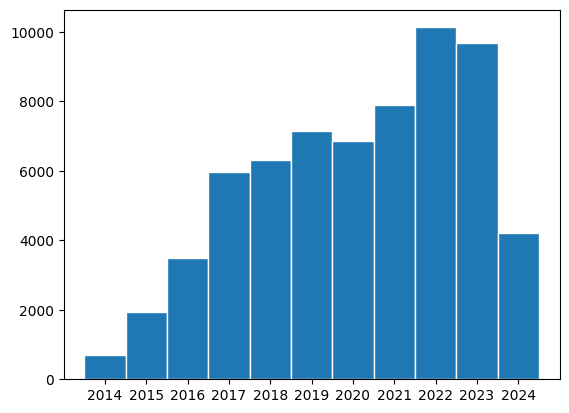

In [70]:
fig, ax = plt.subplots()
ax.bar(numbers_of_commits_by_year.index.to_numpy(), numbers_of_commits_by_year['Commits'].to_numpy(), width = 1, edgecolor = 'white')
ax.set(xlim = (2013, 2025), xticks= np.arange(2014, 2025))
plt.show()

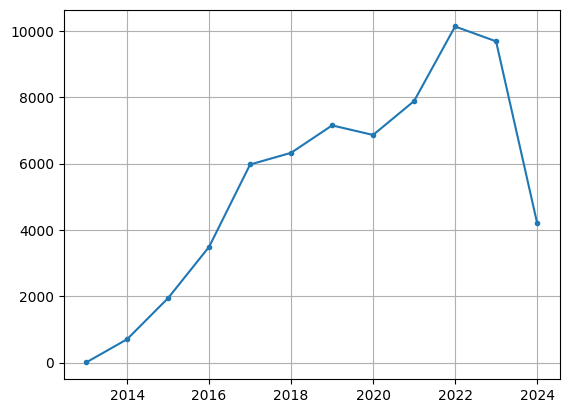

In [71]:
plt.plot(numbers_of_commits_by_year, marker='.')
plt.grid()
plt.show()

# 2. Số người đóng góp vào repo qua từng năm

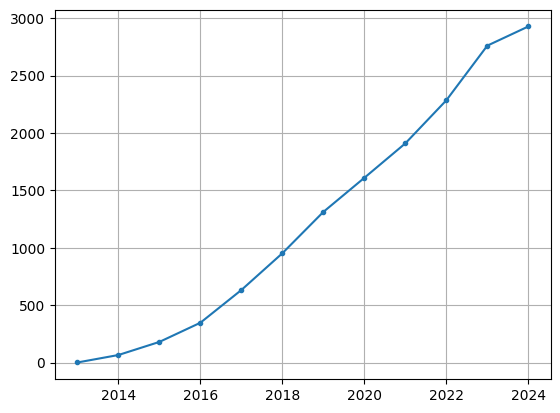

In [72]:
plt.plot(contributors_each_year_frame, marker= '.')
plt.grid()

# 3. Phần trăm đóng góp vào repo của các contributors

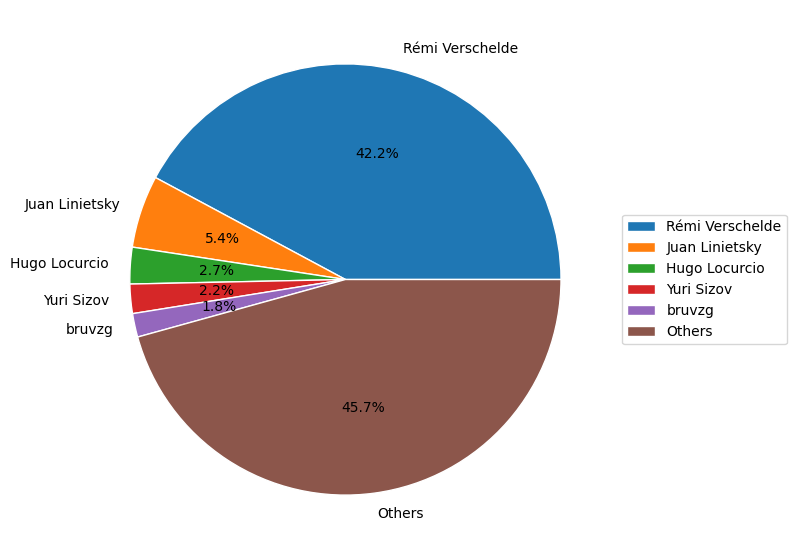

In [73]:
fig, ax = plt.subplots(figsize= (10, 7))
dict = sorted_author.items()
dict = list(dict)
dict = np.array(dict)
dict = dict[dict[:, 1].astype('int32') > 1000]
dict = np.vstack((dict, ['Others', len(commits) - sum(dict[:, 1].astype('int32'))]))
ax.pie(dict[:, 1].astype('int32'), labels=dict[:, 0],
       autopct= lambda pct : "{:.1f}%".format(pct),
       wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
       )
ax.legend(loc= 'center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()


# 4. Biểu diễn lượng commits của 5 người nhiều commits nhất qua các năm

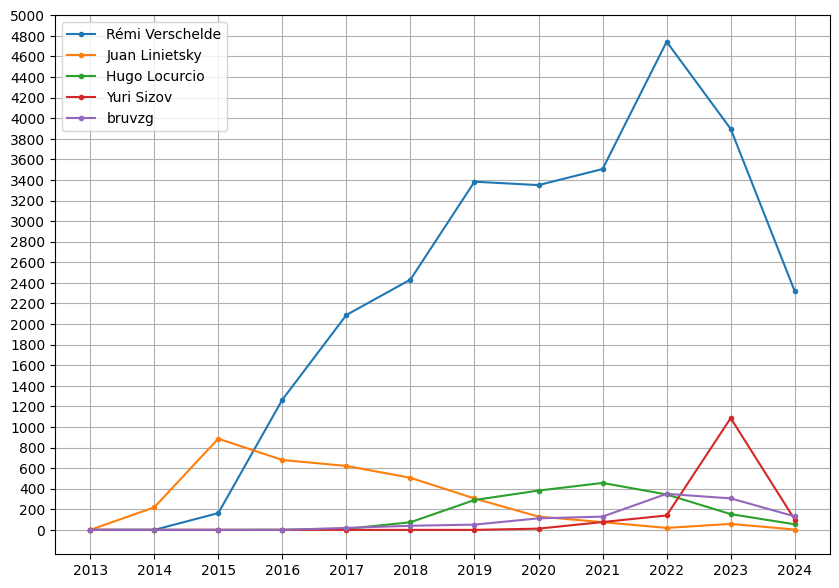

In [74]:
fig, ax = plt.subplots(figsize= (10, 7))
authors_to_visualize = commits_each_year_frame.iloc[:5]
for name, data in authors_to_visualize.iterrows():
    ax.plot(data, label= data.name, marker='.')
ax.set_xticks(np.arange(2013, 2025))
ax.set_yticks(np.linspace(0, 5000, 26))
ax.grid()
ax.legend()

# 5. Boxplot biễu diễn tổng commits của từng người

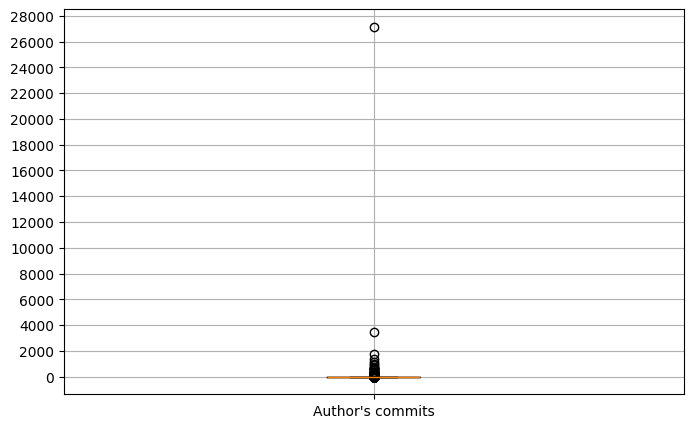

In [75]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.boxplot(sorted_author.values(), vert=1, labels=['Author\'s commits'])
ax.set_yticks(np.linspace(0, 28000, 15))
ax.grid()